In [2]:
import numpy as np
import pandas as pd
import scipy.spatial.distance as sc
from matplotlib import pyplot as plt

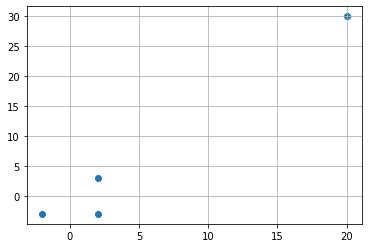

In [3]:
x = np.array([[2,3],
             [20,30],
             [-2,-3],
             [2,-3]])

plt.figure()
plt.scatter(x[:,0],x[:,1])
plt.grid()
plt.show()

In [4]:
x

array([[ 2,  3],
       [20, 30],
       [-2, -3],
       [ 2, -3]])

In [5]:
# Distacia euclideana

D1 = sc.pdist(x,'euclidean')


In [6]:
D1

array([32.44996148,  7.21110255,  6.        , 39.66106403, 37.58989226,
        4.        ])

In [7]:
D1 = sc.squareform(D1)

In [8]:
D1

array([[ 0.        , 32.44996148,  7.21110255,  6.        ],
       [32.44996148,  0.        , 39.66106403, 37.58989226],
       [ 7.21110255, 39.66106403,  0.        ,  4.        ],
       [ 6.        , 37.58989226,  4.        ,  0.        ]])

In [ ]:
# Distacia Jaccard
# Distacia braycurtis



In [9]:
# Manhatan
D2 = sc.pdist(x, 'cityblock')

In [10]:
D2= sc.squareform(D2)

In [11]:
D2


array([[ 0., 45., 10.,  6.],
       [45.,  0., 55., 51.],
       [10., 55.,  0.,  4.],
       [ 6., 51.,  4.,  0.]])

In [15]:
# canberra

D3 = sc.pdist(x, 'canberra')

In [16]:
D3

array([1.63636364, 2.        , 1.        , 2.        , 1.81818182,
       1.        ])

In [17]:
D3= sc.squareform(D3)

In [18]:
D3

array([[0.        , 1.63636364, 2.        , 1.        ],
       [1.63636364, 0.        , 2.        , 1.81818182],
       [2.        , 2.        , 0.        , 1.        ],
       [1.        , 1.81818182, 1.        , 0.        ]])

$$\sum_i \frac{|u_i - v_i|}{|u_i| + |v_i|}$$

In [19]:
# 1.- estándarizar los datos x, luego calcular la distancia euclideana

x


array([[ 2,  3],
       [20, 30],
       [-2, -3],
       [ 2, -3]])

In [25]:
x.mean()

6.125

$$z= \frac{x-\mu}{\sigma}$$

In [26]:
x.std()

11.395585768182345

In [27]:
z = (x - x.mean())/x.std()

In [28]:
# datos estandarizados
z

array([[-0.36198227, -0.27422899],
       [ 1.21757673,  2.0951095 ],
       [-0.71299538, -0.80074866],
       [-0.36198227, -0.80074866]])

In [32]:
Dz = sc.pdist(z, 'euclidean')

In [34]:
Dz = sc.squareform(Dz)

In [35]:
Dz

array([[0.        , 2.84759047, 0.63279788, 0.52651966],
       [2.84759047, 0.        , 3.48038836, 3.29863625],
       [0.63279788, 3.48038836, 0.        , 0.35101311],
       [0.52651966, 3.29863625, 0.35101311, 0.        ]])

In [ ]:
# 2.- utilizar scipy para calcular la distancia euclideana estandarizada

In [36]:
Dze = sc.pdist(x, 'seuclidean')

Dze = sc.squareform(Dze)

In [37]:
Dze

array([[0.        , 2.5053467 , 0.55674371, 0.38080849],
       [2.5053467 , 0.        , 3.06209041, 2.77973257],
       [0.55674371, 3.06209041, 0.        , 0.40613847],
       [0.38080849, 2.77973257, 0.40613847, 0.        ]])

### Similitud por Coseno

La función de similitud del coseno es:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$ A $ y $ B $ representan los vectores y $ A_i $ o $ B_i $ representan el índice i de ese vector.
& Hay que tener en cuenta que si A y B son idénticos, se obtendrá $ cos (\theta) = 1 $.

* De lo contrario, si son totalmente opuestos, es decir, $ A = -B $, obtendría $ cos (\theta) = -1 $.
* Si obtiene $ cos (\ theta) = 0 $, eso significa que son ortogonales (o perpendiculares).
* Los números entre 0 y 1 indican una puntuación de similitud.
* Los números entre -1-0 indican una puntuación de disimilitud.



### Deducción

$$A\cdot B = ||A||||B||cos(\theta)$$

$$\frac{A\cdot B}{||A||||B||} = cos(\theta)= similaridad \in [-1,1]$$

$$d= 1 - similaridad = 1 - \frac{A\cdot B}{||A||||B||} \in \{0,2\}$$

**Instrucciones**: Implemente una función que tome dos vectores y calcule la distancia del coseno.

In [1]:
def cosine_similarity(A,B):
    
    dot = np.dot(A,B)
    norm_a = np.sqrt(np.dot(A,A))
    norm_b = np.sqrt(np.dot(B,B))
    
    cos = dot/(norm_a*norm_b)
    
    return cos

In [38]:
A = np.array([1,5,7])
B = np.array([1,0,-8])

In [39]:
np.dot(A,B)

-55

In [40]:
Dc = sc.pdist(x,'cosine')


In [41]:
Dc = sc.squareform(Dc)

In [42]:
Dc

array([[0.        , 0.        , 2.        , 1.38461538],
       [0.        , 0.        , 2.        , 1.38461538],
       [2.        , 2.        , 0.        , 0.61538462],
       [1.38461538, 1.38461538, 0.61538462, 0.        ]])

In [54]:
x

array([[ 2,  3],
       [20, 30],
       [-2, -3],
       [ 2, -3]])

In [45]:
P1=x[1,:]

In [49]:
P2 = x[0,:]

In [50]:
P1

array([20, 30])

In [51]:
P2

array([2, 3])

In [52]:
P1c = 10*P2

In [53]:
P1c

array([20, 30])